## Лабораторная работа № 7. Методы метрической классификации
### (Валяев Георгий, ПИ20-6)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Задания для выполнения

##### 1. Загрузите [данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database) о диагностике сахарного диабета;

Для начала работы обратимся к набору данных pima-indian-diabetes. Это довольно известный датасет, собравший информацию о медицинских показателях порядка 700 пациентов, обследованных на предмет наличия сахарного диабета. На нем мы потренируемся строить классификационные модели.

In [2]:
dataframe = pd.read_csv('data/diabetes.csv', names=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'], header=None)[1:]
dataframe

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


При проведении серьезного анализа перед построением модели машинного обучения нужно провести тщательную обработку и очистку набора данных - удаление пропущенных значений, анализ шкал, нормализация, удаление выбросов и аномалий. Используемый нами набор - сам по себе довольно чистый, потому в учебных целях пропустим этот шаг.

##### 2. Разделите эти данные на тестовую и обучающую выборки;

In [3]:
Y = dataframe.label
X = dataframe.drop(['label'], axis=1)
X

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
1,6,148,72,35,0,33.6,0.627,50
2,1,85,66,29,0,26.6,0.351,31
3,8,183,64,0,0,23.3,0.672,32
4,1,89,66,23,94,28.1,0.167,21
5,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63
765,2,122,70,27,0,36.8,0.34,27
766,5,121,72,23,112,26.2,0.245,30
767,1,126,60,0,0,30.1,0.349,47


In [4]:
Y

1      1
2      0
3      1
4      0
5      1
      ..
764    0
765    0
766    0
767    1
768    0
Name: label, Length: 768, dtype: object

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=True)

В данном случае мы используем удобную встроенную функцию sklearn для разбиения выборки. Мы используем соотношение 80/20 для обучающей и тестовой выборки. Соотношение может колебаться и зависит от множества факторов, но 80/20 - хорошее значение по умолчанию.

##### 3. Постройте модель классификации для определения заболевания — модель логистической регрессии

In [6]:
cls = LogisticRegression()

Здесь мы создаем объект классификатора, используя конструктор по умолчанию. Если нам нужно изменить стандартные параметры логистической регрессии (например, задать значение параметра регуляризации), то это можно сделать именно на этом этапе.

In [7]:
start_time = time.time()
# процесс обучения с измерением времени
cls.fit(x_train, y_train)
end_time = time.time()
print(f"Обучение линейной регрессионной модели получилось за {round(end_time - start_time, 6)} секунд(-ы).")

Обучение линейной регрессионной модели получилось за 0.112722 секунд(-ы).


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Для оценки эффективности полученной модели сделаем предсказания по нашему классификатору на тестовой выборке (там, где мы уже знаем правильные ответы, чтобы сравнить, насколько предсказания расходятся с действительностью):

In [8]:
y_pred = cls.predict(x_test)
print("Предсказание по классификатору:")
print(np.array(y_pred))

Предсказание по классификатору:
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '1' '0' '1' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '0' '1' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0'
 '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1'
 '1' '0' '0' '0' '0' '0' '0' '1' '0' '0']


Оценим эффективность предсказания тестовой выборки при помощи матрицы классификации

Матрица классификации показывает нам очень полезную информацию: совместное распределение числа объектов предсказанных и реальных классов. Рассматривая эту матрицу мы можем получить важную информацию: сколько объектов мы классифицировали правильно, сколько неверно, к каким классам наша модель тяготеет, какие классы распознаются хорошо, какие - плохо

In [9]:
class_matrix = metrics.confusion_matrix(y_test, y_pred)
class_matrix

array([[89, 10],
       [24, 31]], dtype=int64)

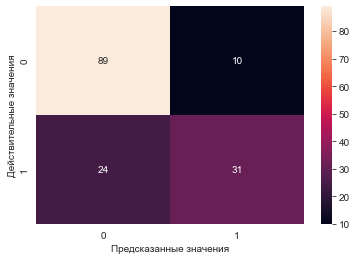

In [10]:
classes = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
sns.heatmap(pd.DataFrame(class_matrix), annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

##### 4. Оцените качество модели на тестовой выборке с помощью следующих метрик:
#####     достоверность предсказания (accuracy);
#####     точность (precision);
#####     полнота (recall);

In [11]:
print("Достоверность предсказания выборки (accuracy):")
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

Достоверность предсказания выборки (accuracy):


0.7792207792207793

In [12]:
print("Точность выборки (precision):")
precision = metrics.precision_score(y_test, y_pred, pos_label='1')
precision

Точность выборки (precision):


0.7560975609756098

In [13]:
print("Полнота выборки (recall):")
recall = metrics.recall_score(y_test, y_pred, pos_label='1')
recall

Полнота выборки (recall):


0.5636363636363636

##### 5. Сделайте вывод о применимости модели

In [14]:
print('Средний итог для вывода : ' + str(round(sum([accuracy, precision, recall]) / 3, 4)))

Средний итог для вывода : 0.6997


###### Подводя итог реализации и обучения модели логистической регрессии, можно сделать вывод, что данная модель в среднем на 70% будет полезна при применении на других выборках данных.